<a href="https://colab.research.google.com/github/Bharu07/Pytorch_Repository_bharu/blob/main/Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [45]:
#Create a Model class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) --> Hidden layer 1(number of neurons) --> Hiddenlayer 2 (number of neurons) -> output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_features)


  def forward(self, x):
    x = F.relu(self.fc1(x)) #relu = rectified linear unit = If the value is greater than zero the value remains the same, if the value is less than zero, then the value remains zero.
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [46]:
#Pick a manual seed for randomization
torch.manual_seed(42)

#Create an instance of model
model = Model()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [49]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [50]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [51]:
#Change the last column from string to integer
my_df['variety']=my_df['variety'].replace('Setosa', 0.0)
my_df['variety']=my_df['variety'].replace('Versicolor', 1.0)
my_df['variety']=my_df['variety'].replace('Virginica', 2.0)

In [52]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [53]:
#Train Test Split! Set X,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [54]:
#Convert this to numpy arrays.
X = X.values
y = y.values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [57]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [58]:
#Convert y features to float tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [59]:
#Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

#Choose Adam optimizer, lr = learning rate(if error doesn't go down after a bunch of iterations(epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [60]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [61]:
#Train out model
# Epochs = one run through all the training data in our network
epochs = 100
losses = []
for i in range(epochs):
  #GO forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values vs y_train value

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch : {i} and loss : {loss}')

  #Do some back propagation : Take the error rate of forward propogation and feed it back through the network to fine tune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch : 0 and loss : 1.0935293436050415
Epoch : 10 and loss : 0.9156933426856995
Epoch : 20 and loss : 0.7563302516937256
Epoch : 30 and loss : 0.6106743216514587
Epoch : 40 and loss : 0.4407137632369995
Epoch : 50 and loss : 0.2712990641593933
Epoch : 60 and loss : 0.15888482332229614
Epoch : 70 and loss : 0.09664525091648102
Epoch : 80 and loss : 0.0672047957777977
Epoch : 90 and loss : 0.052712492644786835


Text(0.5, 0, 'Epoch')

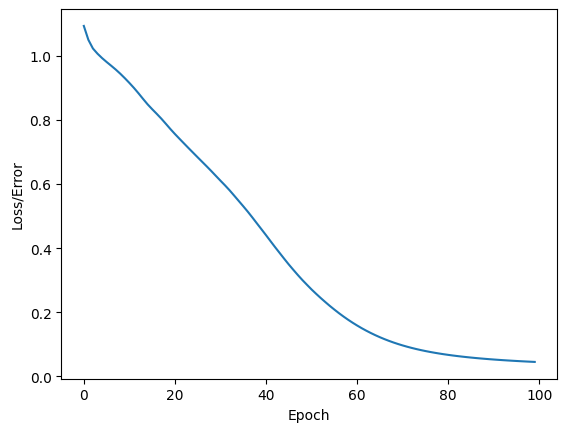

In [62]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [63]:
#Evaluate Model on Test Data set (Validate model on test set)
with torch.no_grad():  #Basically turn off back propagation
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [64]:
loss

tensor(0.1314)

In [78]:
correct = 0
with torch.no_grad():
  for i, data in  enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "verginica"

    #Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1


print(f'We got {correct} correct')

1.)  tensor([-4.9147,  3.6675,  6.5270]) 		 verginica 	 2
2.)  tensor([-7.4808,  2.4044,  9.2141]) 		 verginica 	 2
3.)  tensor([-7.6609,  3.5156,  9.5637]) 		 verginica 	 2
4.)  tensor([-0.9707,  6.3981,  2.5289]) 		 Versicolor 	 1
5.)  tensor([-6.0174,  3.7075,  7.7697]) 		 verginica 	 2
6.)  tensor([0.8261, 6.8920, 0.6797]) 		 Versicolor 	 1
7.)  tensor([-4.0778,  4.4137,  5.7124]) 		 verginica 	 2
8.)  tensor([-0.5909,  6.5264,  2.1343]) 		 Versicolor 	 1
9.)  tensor([-4.9652,  4.0816,  6.6547]) 		 verginica 	 2
10.)  tensor([-7.8227,  2.6186,  9.6259]) 		 verginica 	 2
11.)  tensor([-3.6710,  4.5696,  5.2838]) 		 verginica 	 2
12.)  tensor([ 7.9602,  2.6097, -6.6232]) 		 Setosa 	 0
13.)  tensor([ 7.1548,  2.2695, -5.9122]) 		 Setosa 	 0
14.)  tensor([1.3314, 5.5271, 0.0162]) 		 Versicolor 	 1
15.)  tensor([ 7.1044,  2.9239, -5.7746]) 		 Setosa 	 0
16.)  tensor([-3.3978,  5.0669,  5.0355]) 		 verginica 	 1
17.)  tensor([ 7.4249,  2.5209, -6.1317]) 		 Setosa 	 0
18.)  tensor([-4.492

In [84]:
new_iris_1 = torch.tensor([4.7, 3.2, 1.3, 0.2])
new_iris_2 = torch.tensor([5.9, 10.2, 0.3, 5.2])
new_iris_3 = torch.tensor([0.7, 9.2, 8.3, 32.2])
new_iris_4 = torch.tensor([124.7, 243.2, 312.3, 134.2])

In [85]:
with torch.no_grad():
  print(model(new_iris_1))
  print(model(new_iris_2))
  print(model(new_iris_3))
  print(model(new_iris_4))

tensor([ 7.5125,  2.4206, -6.2280])
tensor([ 8.9261,  3.0177, -7.4758])
tensor([-48.8358, -23.1329,  54.6944])
tensor([-701.8057, -232.7447,  751.1837])


In [86]:
# Save our NN Model
torch.save(model.state_dict(), 'bharu_awesome_iris_model')

In [91]:
#Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('bharu_awesome_iris_model'))

<All keys matched successfully>

In [89]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)